In [1]:
#Importing useful libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

C:\Users\monta\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
#!pip install pandas
pd.__version__

'1.3.5'

In [3]:
#Uploading data set into a data frame
df = pd.read_csv("player_mvp_stats.csv")

In [4]:
#Insert MVP column with default value of 'No'
df.insert(0,"MVP","No",)

In [5]:
#Isolate the MVP award winners from each year
df.groupby('Year')['Share'].max()

Year
1991    0.928
1992    0.938
1993    0.852
1994    0.880
1995    0.858
1996    0.986
1997    0.857
1998    0.934
1999    0.701
2000    0.998
2001    0.904
2002    0.757
2003    0.808
2004    0.991
2005    0.839
2006    0.739
2007    0.882
2008    0.873
2009    0.969
2010    0.980
2011    0.977
2012    0.888
2013    0.998
2014    0.986
2015    0.922
2016    1.000
2017    0.879
2018    0.955
2019    0.932
2020    0.952
2021    0.961
Name: Share, dtype: float64

In [6]:
#Changing values of MVP column for each winner
df['MVP'] = np.where((df['Share'] == 0.928 ) & (df['Year'] == 1991),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.938 ) & (df['Year'] == 1992),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.852 ) & (df['Year'] == 1993),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.880 ) & (df['Year'] == 1994),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.858 ) & (df['Year'] == 1995),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.986 ) & (df['Year'] == 1996),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.857 ) & (df['Year'] == 1997),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.934 ) & (df['Year'] == 1998),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.701 ) & (df['Year'] == 1999),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.998 ) & (df['Year'] == 2000),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.904 ) & (df['Year'] == 2001),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.757 ) & (df['Year'] == 2002),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.808 ) & (df['Year'] == 2003),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.991 ) & (df['Year'] == 2004),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.839 ) & (df['Year'] == 2005),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.739 ) & (df['Year'] == 2006),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.882 ) & (df['Year'] == 2007),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.873 ) & (df['Year'] == 2008),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.969 ) & (df['Year'] == 2009),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.980 ) & (df['Year'] == 2010),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.977 ) & (df['Year'] == 2011),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.888 ) & (df['Year'] == 2012),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.998 ) & (df['Year'] == 2013),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.986 ) & (df['Year'] == 2014),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.922 ) & (df['Year'] == 2015),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 1.000 ) & (df['Year'] == 2016),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.879 ) & (df['Year'] == 2017),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.955 ) & (df['Year'] == 2018),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.932 ) & (df['Year'] == 2019),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.952 ) & (df['Year'] == 2020),'Yes',df['MVP'])
df['MVP'] = np.where((df['Share'] == 0.961 ) & (df['Year'] == 2021),'Yes',df['MVP'])

df['MVP'].describe()

count     14092
unique        2
top          No
freq      14061
Name: MVP, dtype: object

In [7]:
df = df.drop(columns=['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 
                      'eFG%','FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TOV', 'Year', 'Pts Won', 'Pts Max', 'Share', 'Team', 'W',
                      'L', 'GB','PS/G', 'PA/G', 'SRS', 'PF'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14092 entries, 0 to 14091
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MVP     14092 non-null  object 
 1   FG%     14042 non-null  float64
 2   TRB     14092 non-null  float64
 3   AST     14092 non-null  float64
 4   STL     14092 non-null  float64
 5   BLK     14092 non-null  float64
 6   PTS     14092 non-null  float64
 7   W/L%    14092 non-null  float64
dtypes: float64(7), object(1)
memory usage: 880.9+ KB


In [9]:
#Check columns for missing values
df.isnull().sum()

MVP      0
FG%     50
TRB      0
AST      0
STL      0
BLK      0
PTS      0
W/L%     0
dtype: int64

In [10]:
#Drops columns with missing values
df = df.dropna()
df.isnull().sum()

MVP     0
FG%     0
TRB     0
AST     0
STL     0
BLK     0
PTS     0
W/L%    0
dtype: int64

In [11]:
#Summary statistics for each continuous variable
df.describe()

,FG%,TRB,AST,STL,BLK,PTS,W/L%
count,14042.000000,14042.000000,14042.000000,14042.000000,14042.000000,14042.000000,14042.000000
mean,0.438541,3.588207,1.854650,0.659529,0.418843,8.283457,0.496726
std,0.092643,2.522992,1.832496,0.459153,0.491823,5.980369,0.155604
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.106000
25%,0.401000,1.800000,0.600000,0.300000,0.100000,3.600000,0.378000
50%,0.440000,3.000000,1.300000,0.600000,0.300000,6.800000,0.512000
75%,0.482000,4.800000,2.500000,0.900000,0.500000,11.700000,0.610000
max,1.000000,18.700000,14.200000,3.000000,4.500000,36.100000,0.890000


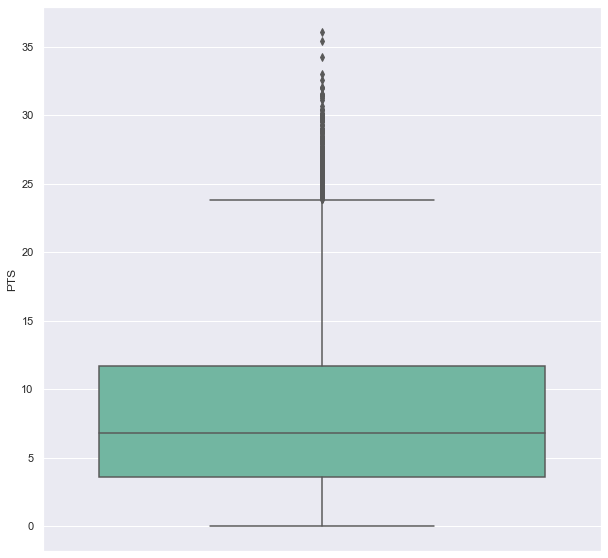

In [12]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.boxplot(x=df['PTS'], orient="v", palette="Set2")

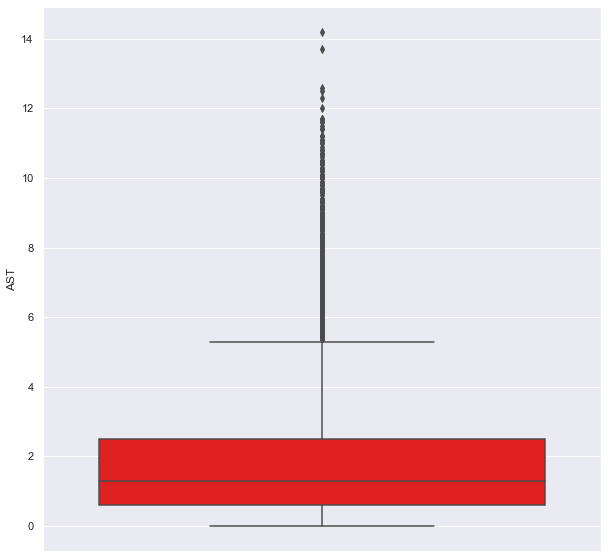

In [13]:
sns.boxplot(x=df["AST"], orient="v", color='red')

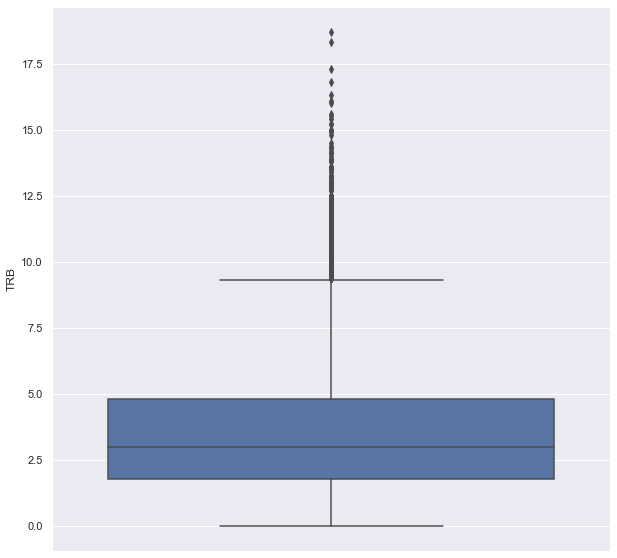

In [14]:
sns.boxplot(x=df['TRB'], orient="v")

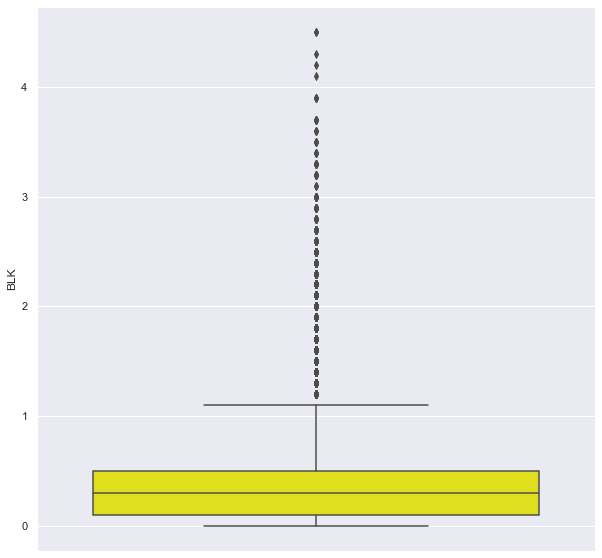

In [15]:
sns.boxplot(x=df['BLK'], orient="v",color='yellow')

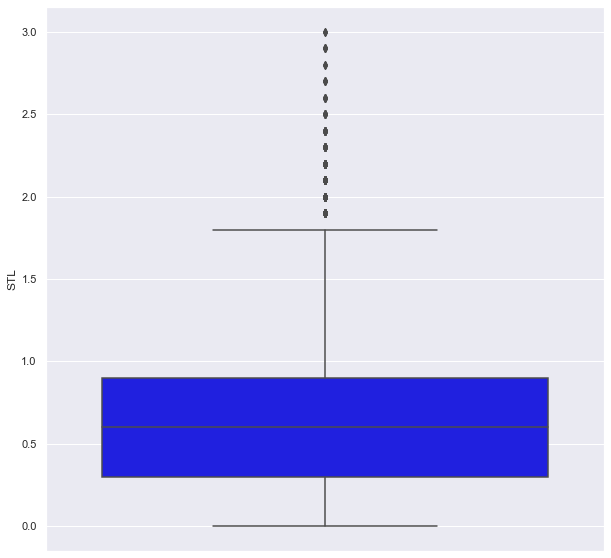

In [16]:
sns.boxplot(x=df['STL'], orient="v", color='blue')

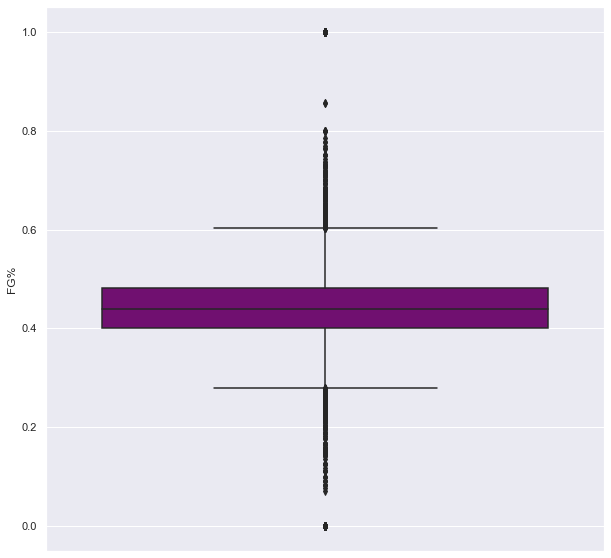

In [17]:
sns.boxplot(x=df['FG%'], orient="v", color='purple')

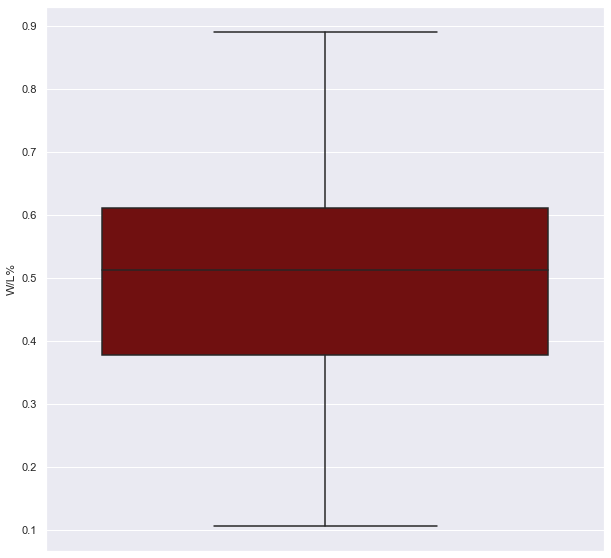

In [18]:
sns.boxplot(x=df['W/L%'], orient="v", color='maroon')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF74468748>,
      dtype=object)

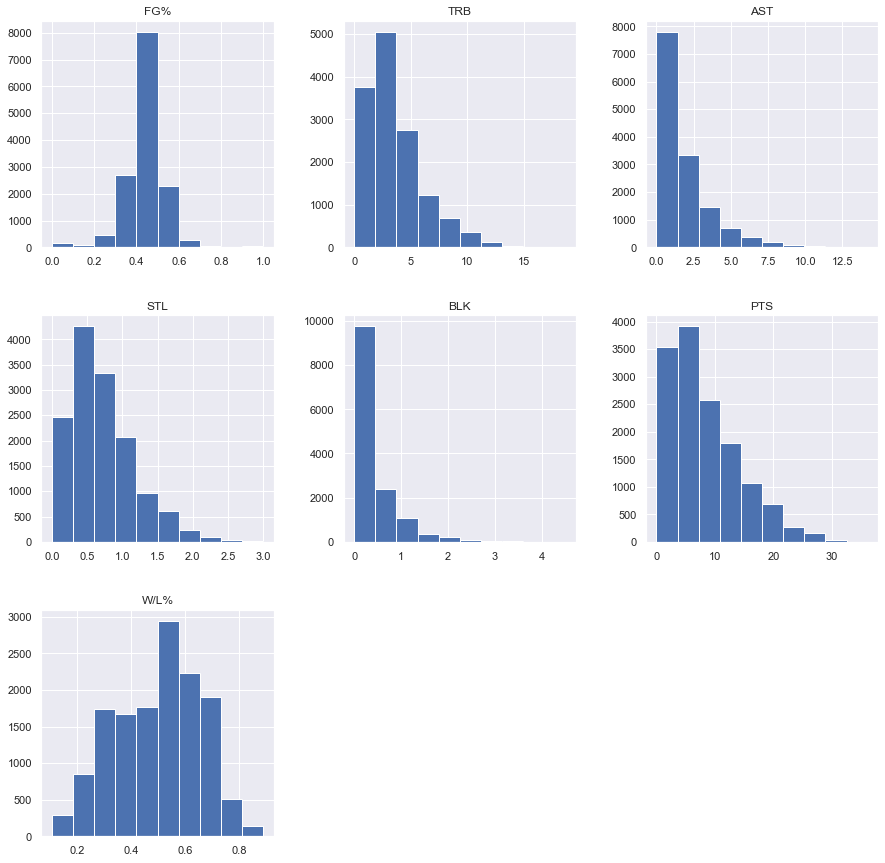

In [19]:
#Univarite graphs for continuous variables
df.hist(figsize = (15,15))

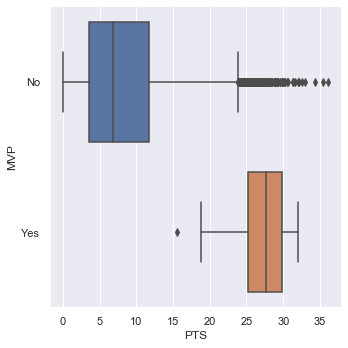

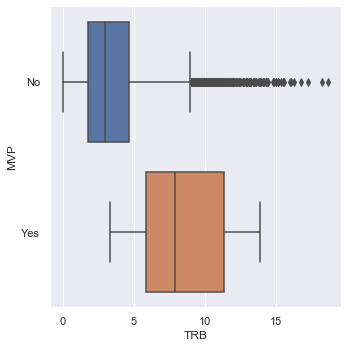

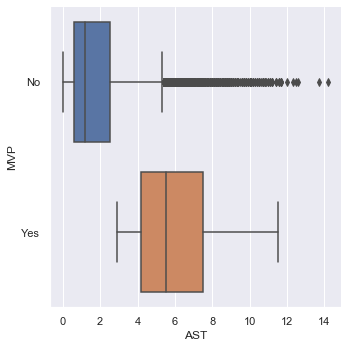

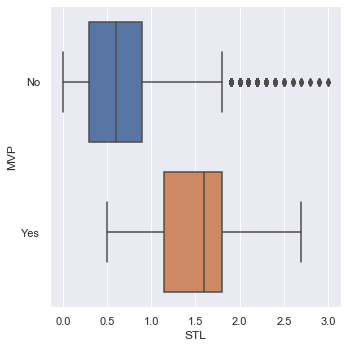

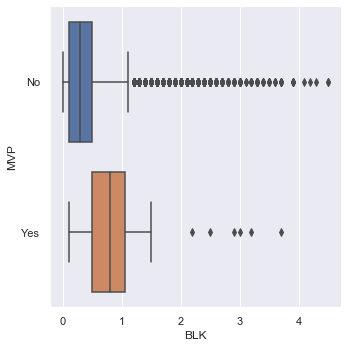

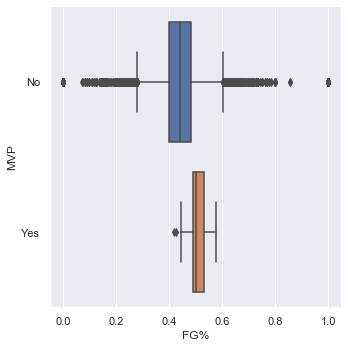

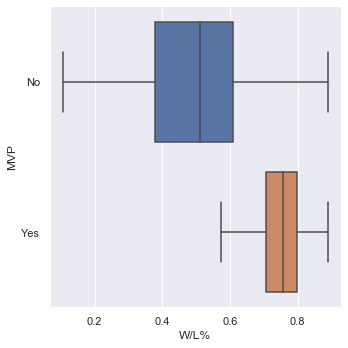

In [20]:
#Bivariate graphs for continuous variables
sns.catplot(x="PTS", y="MVP", data=df, kind="box")
sns.catplot(x="TRB", y="MVP", data=df, kind="box")
sns.catplot(x="AST", y="MVP", data=df, kind="box")
sns.catplot(x="STL", y="MVP", data=df, kind="box")
sns.catplot(x="BLK", y="MVP", data=df, kind="box")
sns.catplot(x="FG%", y="MVP", data=df, kind="box")
sns.catplot(x="W/L%", y="MVP", data=df, kind="box")

In [21]:
#Turning the MVP column into a dummy variable for the regression
y=pd.get_dummies(df["MVP"], drop_first=True)
y.describe()

,Yes
count,14042.000000
mean,0.002208
std,0.046936
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [22]:
import warnings
warnings.simplefilter(action='ignore')

In [23]:
x = df.drop(columns= ['MVP'])
X = sm.add_constant(x)
lr=sm.Logit(y,X)
lrfit = lr.fit()
lrfit.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                14042
Model:                          Logit   Df Residuals:                    14034
Method:                           MLE   Df Model:                            7
Date:                Fri, 24 Jun 2022   Pseudo R-squ.:                     inf
Time:                        12:15:25   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.0863      5.857     -6.673      0.000     -50.566     -27.607
FG%            2.9147      7.639      0.382      0.703     -12.058      17.888
TRB            0.3606      0.144      2.505      0.012       0.079       0.643
AST            0.5715      0.139      4.124      0.000       0.300       0.843
STL           -0.0453      0.598     -0.076      0.940      -1.217       1.127
BLK            0.1021      0.433      0.236      0.814      -0.746       0.950
PTS            0.3996      0.070      5.710      0.000       0.262       0.537
W/L%          26.8531      4.487      5.985      0.000      18.059      35.648
==============================================================================

Possibly complete quasi-separation: A fraction 0.94 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [24]:
X = X.drop(columns='STL')
lr=sm.Logit(y,X)
lrfit = lr.fit()
lrfit.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                14042
Model:                          Logit   Df Residuals:                    14035
Method:                           MLE   Df Model:                            6
Date:                Fri, 24 Jun 2022   Pseudo R-squ.:                     inf
Time:                        12:38:52   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.1288      5.834     -6.707      0.000     -50.563     -27.695
FG%            3.0090      7.541      0.399      0.690     -11.771      17.789
TRB            0.3628      0.141      2.571      0.010       0.086       0.639
AST            0.5691      0.135      4.220      0.000       0.305       0.833
BLK            0.0997      0.431      0.231      0.817      -0.745       0.944
PTS            0.3982      0.067      5.913      0.000       0.266       0.530
W/L%          26.8024      4.432      6.047      0.000      18.116      35.489
==============================================================================

Possibly complete quasi-separation: A fraction 0.94 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [25]:
X = X.drop(columns='BLK')
lr=sm.Logit(y,X)
lrfit = lr.fit()
lrfit.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                14042
Model:                          Logit   Df Residuals:                    14036
Method:                           MLE   Df Model:                            5
Date:                Fri, 24 Jun 2022   Pseudo R-squ.:                     inf
Time:                        12:38:57   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.1921      5.816     -6.738      0.000     -50.592     -27.792
FG%            3.2326      7.470      0.433      0.665     -11.408      17.874
TRB            0.3795      0.121      3.128      0.002       0.142       0.617
AST            0.5580      0.125      4.450      0.000       0.312       0.804
PTS            0.3984      0.067      5.926      0.000       0.267       0.530
W/L%          26.7816      4.425      6.052      0.000      18.109      35.455
==============================================================================

Possibly complete quasi-separation: A fraction 0.94 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [26]:
X = X.drop(columns='FG%')
lr=sm.Logit(y,X)
lrfit = lr.fit()
lrfit.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                14042
Model:                          Logit   Df Residuals:                    14037
Method:                           MLE   Df Model:                            4
Date:                Fri, 24 Jun 2022   Pseudo R-squ.:                     inf
Time:                        12:39:01   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.9871      5.017     -7.572      0.000     -47.820     -28.154
TRB            0.4014      0.110      3.661      0.000       0.187       0.616
AST            0.5471      0.123      4.465      0.000       0.307       0.787
PTS            0.4008      0.067      5.952      0.000       0.269       0.533
W/L%          27.1029      4.367      6.206      0.000      18.543      35.663
==============================================================================

Possibly complete quasi-separation: A fraction 0.94 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

[[4203    1]
 [   9    0]]
Accuracy score:  0.9976263944932352


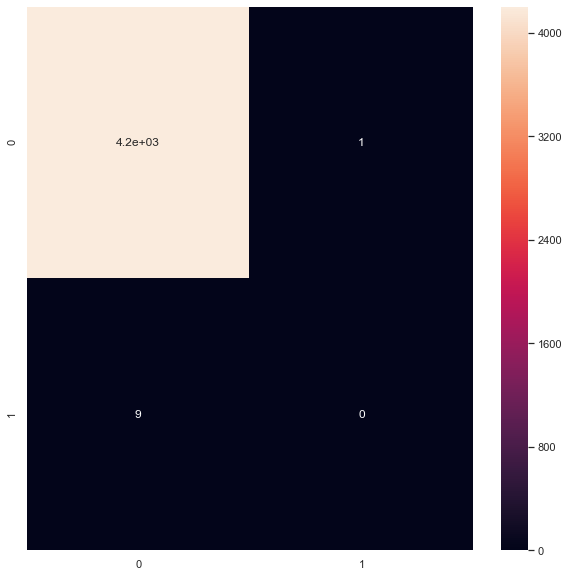

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=0)
logtrain = LogisticRegression(random_state=0)
logtrain.fit(x_train, y_train)
y_pred = logtrain.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy score: ', accuracy_score(y_test, y_pred))


sns.heatmap(cm, annot=True)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4204
           1       0.00      0.00      0.00         9

    accuracy                           1.00      4213
   macro avg       0.50      0.50      0.50      4213
weighted avg       1.00      1.00      1.00      4213



In [32]:
lrprob = logtrain.predict_proba(x_test)
lrprob = lrprob[:,1]
roc_auc = roc_auc_score(y_test, lrprob)
roc_auc



0.9957447933185326

In [33]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, lrprob)

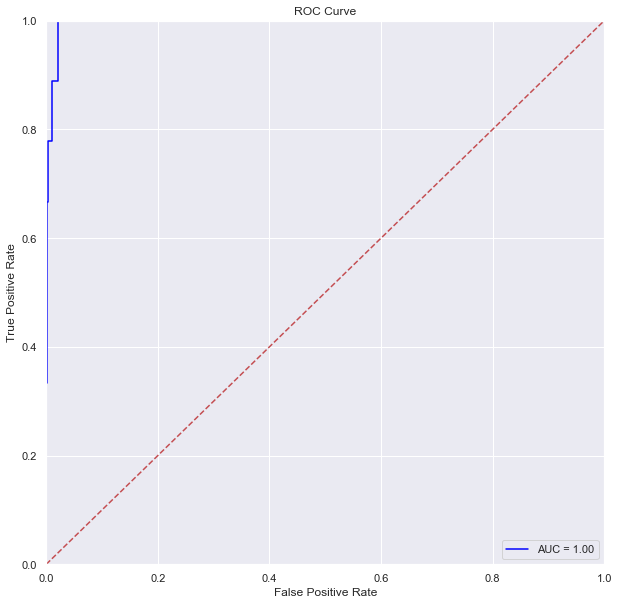

In [34]:
plt.title('ROC Curve')
plt.plot(false_positive_rate, true_positive_rate, 'blue',
         label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
